In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_1630/3390178302.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [12]:
# load dataset
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc").analysed_sst


# get reference ds (2002-2012)
ds_ref = ds.sel(time=slice("2002-01","2012-12"))
# get reference monthly avg climatology for 2002-2012
ds_ref_mean = ds_ref.groupby(ds_ref.time.dt.month).mean()
# get reference monthly sst stdev between 2002 and 2012
ds_ref_std = ds_ref.groupby(ds_ref.time.dt.month).std()

# get length of coordinate directions
_, n_lat, n_lon = ds_ref_mean.shape

In [37]:
def plot_monthly_sst(year: int, month: int):
    """
    Inputs:
        year: year to get SST anomalies
        month: month to get SST anomalies
    
    Returns:
        plot_ax: matplotlib axes object for replicating Fig 1 of
                 https://doi.org/10.1002/2016GL071039
    """
    
    str_time = str(year) + "-" + str(month)
    
    ds_month = ds.sel(time=str_time).mean("time")
    ds_month_norm = ds_month - ds_ref_mean.sel(month=month)

    # pointwise comparison of delta with std, set to 0 if less than 1 std
    mask = (abs(ds_month_norm) > ds_ref_std[month-1,:,:]).data
    ds_month_norm = ds_month_norm * mask
    ds_month_norm.plot()
    #plt.drawstates()
    plt.show()
    return 
    

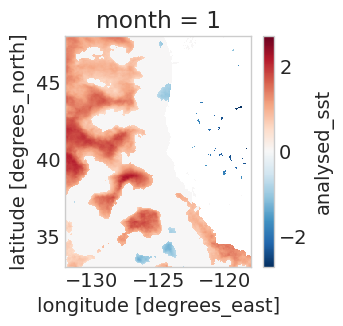

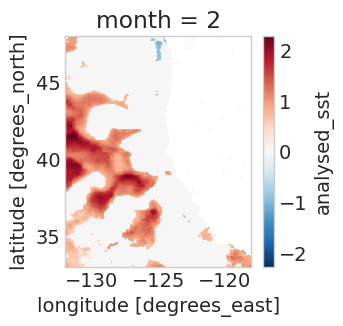

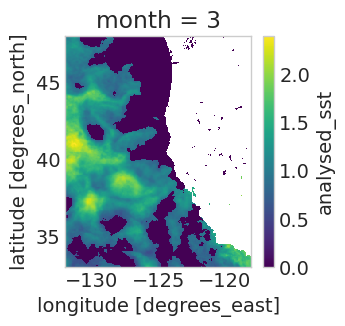

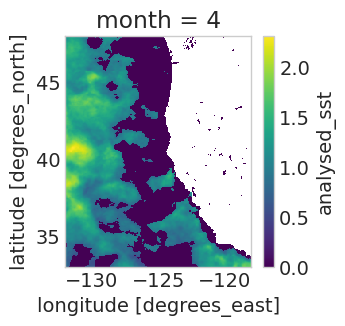

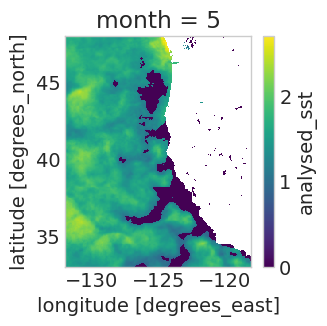

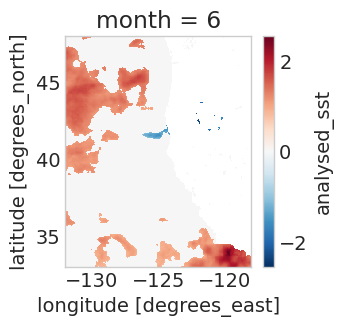

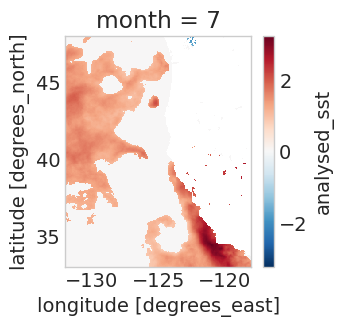

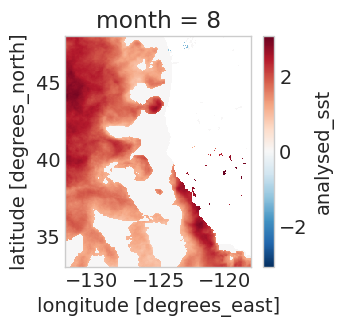

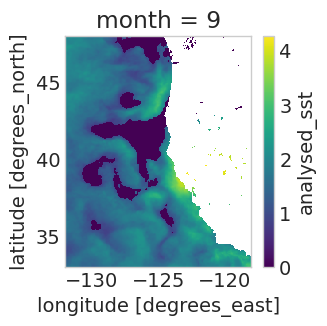

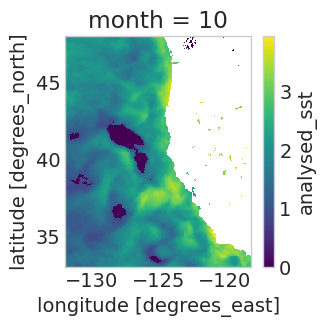

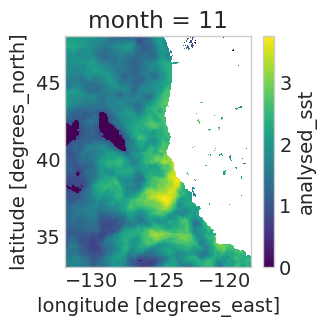

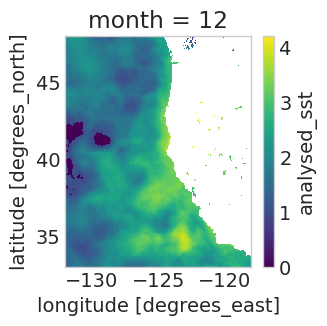

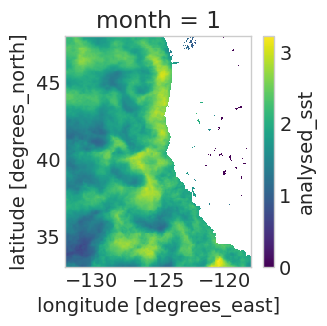

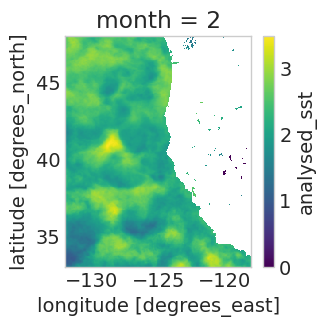

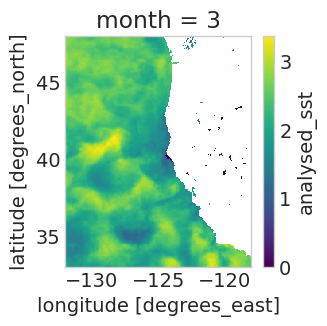

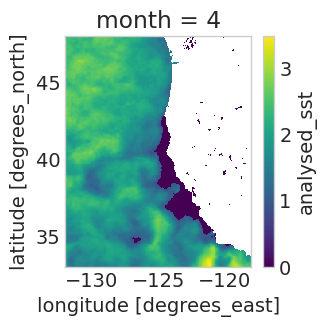

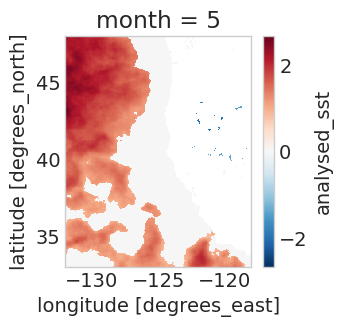

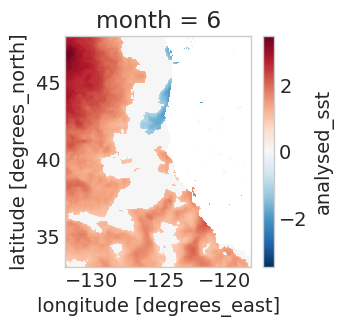

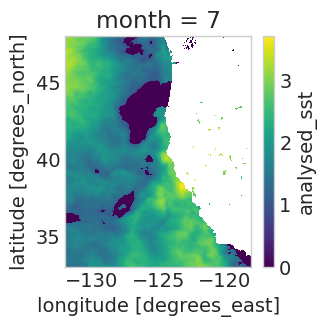

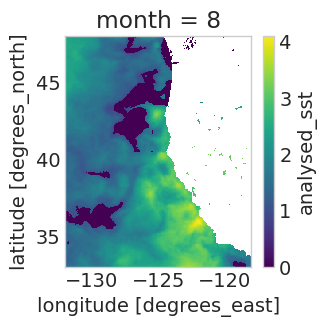

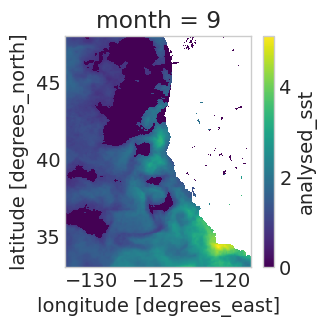

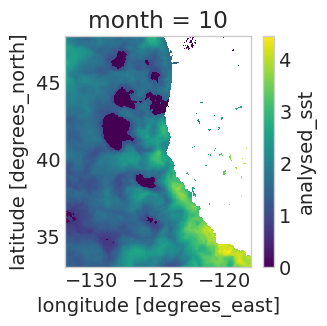

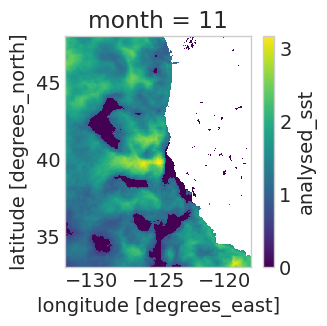

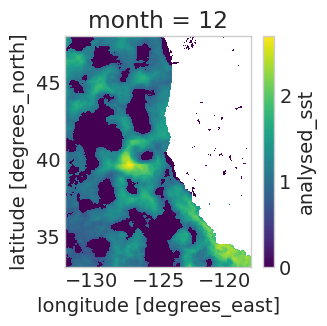

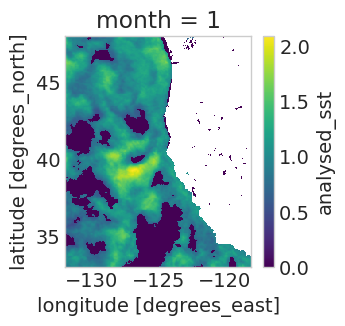

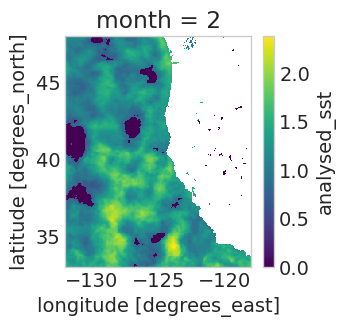

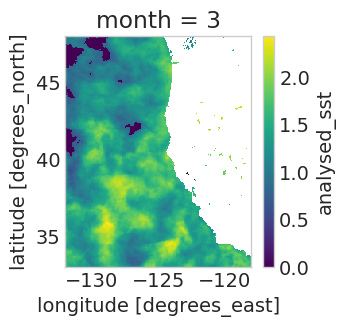

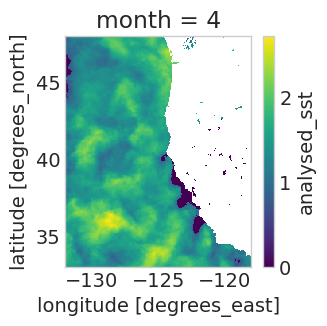

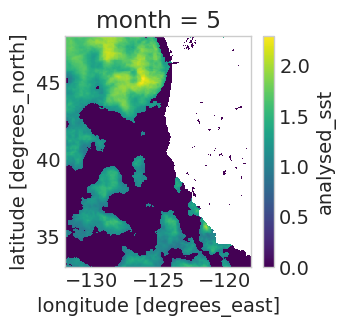

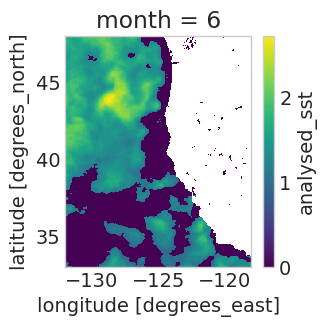

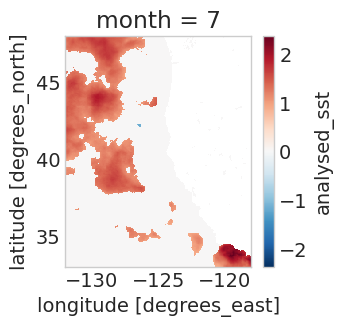

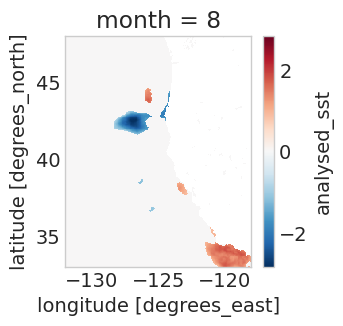

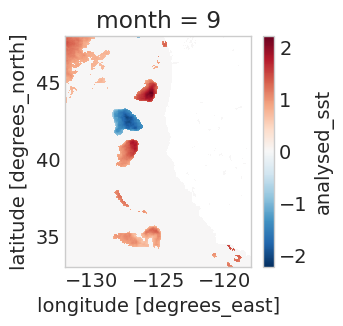

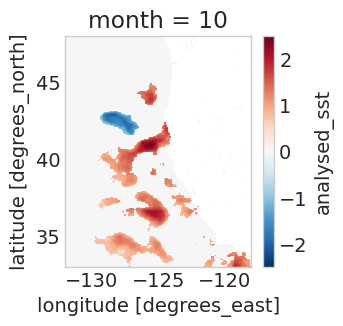

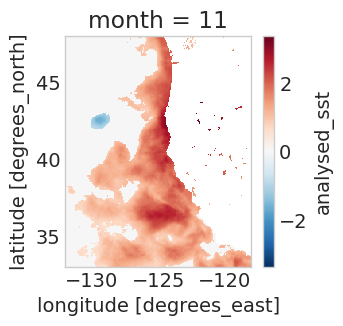

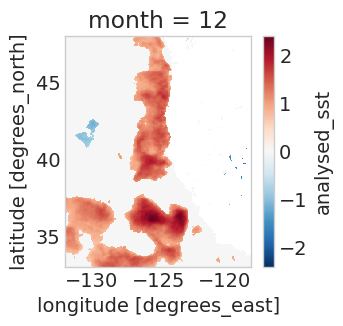

In [39]:
# setup strings for each yr-month pair

years = np.arange(2014,2017)
months = np.arange(1,13)

# fig, axs = plt.subplots(12,3)

for year in years:
    for month in months:
        plot_monthly_sst(year, month)
        
        if year==2017 and month==9:
            break
        